## Week 12: Data Cleaning and Preparation using Pandas

### Topics Covered
- Identifying and handling missing data.
- Data transformation and normalization.
- Data filtering and deduplication.
- Standardization of categorical data.
- Outlier detection and handling.

In [ ]:
# Exercise 1: Identifying and Handling Missing Data
import pandas as pd

# Sample dataset with missing values
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", None],
    "Age": [24, 30, None, 22, 35],
    "Salary": [48000, None, 57000, None, 60000]
}
df = pd.DataFrame(data)

# Filling missing values and dropping rows
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Salary"].fillna(df["Salary"].median(), inplace=True)
df.dropna(subset=["Name"], inplace=True)
print("After cleaning:\n", df)

After cleaning:
       Name    Age   Salary
0    Alice  24.00  48000.0
1      Bob  30.00  57000.0
2  Charlie  27.75  57000.0
3    David  22.00  57000.0


/tmp/ipython-input-3027644318.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)
/tmp/ipython-input-3027644318.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
# Exercise 2: Standardizing Categorical Data
# Sample dataset with inconsistent categorical values
data = {
    "Product": ["Laptop", "Laptop", "Desktop", "Tablet", "Tablet"],
    "Category": ["Electronics", "electronics", "Electronics", "Gadgets", "gadgets"]
}
df = pd.DataFrame(data)

# Standardize category values
df["Category"] = df["Category"].str.capitalize()
print("Standardized Data:\n", df)

Standardized Data:
    Product     Category
0   Laptop  Electronics
1   Laptop  Electronics
2  Desktop  Electronics
3   Tablet      Gadgets
4   Tablet      Gadgets


### Practice Tasks
- Load a dataset of your choice and identify missing values.
- Implement data transformations to normalize numerical columns.
- Standardize categorical columns and remove duplicates.

In [2]:
# Load a dataset of your choice and identify missing values.
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("/home/user/Downloads/titanic.csv")

print(f"Number of rows in the original dataset: {len(df)}")
print(f"Number of rows that contain empty cells: {len(df) - len(df.dropna())}")

print("\nMissing values:")
print(df.isnull().sum())

print(f"\n{df.describe()}")

# Implement data transformations to normalize numerical columns.
numerical_columns = ["Age", "Fare"]

df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace = True)
df.drop(columns=["Cabin"], inplace=True)

scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Standardize categorical columns and remove duplicates.
df["Sex"] = df["Sex"].str.lower()
df["Embarked"] = df["Embarked"].str.lower()

df = df.drop_duplicates()
print(f"\nNumber of rows in the dataset: {len(df)}\n")

print(df.to_string(max_rows=5))

Number of rows in the original dataset: 891
Number of rows that contain empty cells: 708

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch    

/tmp/ipython-input-1472912898.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-1472912898.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

## Homework for Students
- **Week 12**: Clean a real-world dataset (from Kaggle or another source), perform normalization, handle outliers, and prepare the data for analysis.

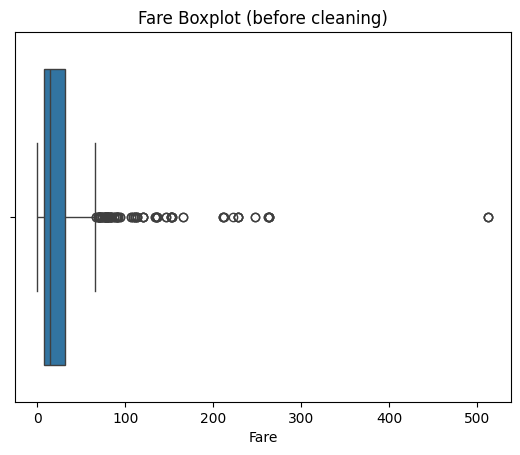




Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipython-input-1962988423.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-1962988423.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

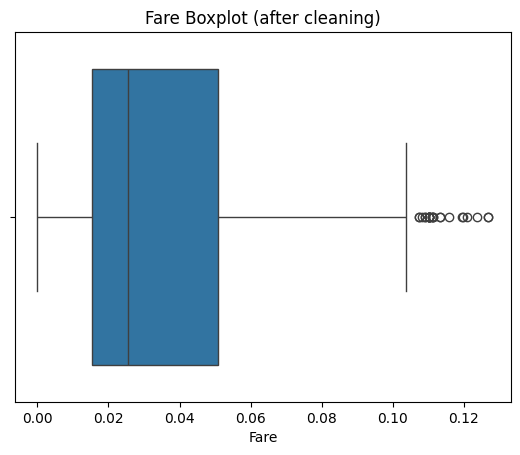


   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name     Sex       Age  SibSp  \
0                       Braund, Mr. Owen Harris    male  0.271174      1   
2                        Heikkinen, Miss. Laina  female  0.321438      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.434531      1   
4                      Allen, Mr. William Henry    male  0.434531      0   
5                              Moran, Mr. James    male  0.346569      0   

   Parch            Ticket      Fare Embarked  
0      0         A/5 21171  0.014151        s  
2      0  STON/O2. 3101282  0.015469        s  
3      0            113803  0.103644        s  
4      0            373450  0.015713        s  
5      0            330877  0.016510        q  


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#df = pd.read_csv("/home/user/Downloads/titanic.csv")
df = pd.read_csv("/content/titanic.csv")

sns.boxplot(x=df["Fare"])
plt.title("Fare Boxplot (before cleaning)")
plt.show()

print("\n")

print("\nMissing values:")
print(df.isnull().sum())

# Implement data transformations to normalize numerical columns.
numerical_columns = ["Age", "Fare"]

df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace = True)
df.drop(columns=["Cabin"], inplace=True)

scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Handle outliers.
Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_bound = Q1 - whisker_width * IQR
upper_bound = Q3 + whisker_width * IQR
df = df[(df["Fare"] >= lower_bound) & (df["Fare"] <= upper_bound)]

# Standardize categorical columns and remove duplicates.
df["Sex"] = df["Sex"].str.lower()
df["Embarked"] = df["Embarked"].str.lower()

df = df.drop_duplicates()

print("\nMissing values:")
print(df.isnull().sum())

sns.boxplot(x=df["Fare"])
plt.title("Fare Boxplot (after cleaning)")
plt.show()

print("")
print(df.head())